# Pymaceuticals Inc.
---

### Analysis

- There were nine drugs used in the study with a control group receiving a placebo.
- 249 mice were used but only 248 sets of result were analysed. One mouse ID had duplicated tests and was removed from analysis.
- The study group consisted of 51% male mice being used.
- Capomulin and Ramicane were the most tested drugs.
- Capomulin had the smallest variance in tumor volume, therefore appeared to be the most successful treatment.
- Infubinol results had outliers in the dataset.
 

###  Prepare the Data

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice. By using the Mouse ID and returning only unique values                  
mouse_count = len(mouse_data_complete['Mouse ID'].unique())
mouse_count


249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicate_rows = mouse_data_complete[duplicates]
dup_value = duplicate_rows['Mouse ID'].unique()
dup_value

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# use if statement to collect the Mouse Id that is duplicated, if more than one.
# display all data for the duplicated mouse id
selected_mouse = dup_value[0]if dup_value else None
dup_mouse_values = mouse_data_complete[mouse_data_complete['Mouse ID'] == selected_mouse]
dup_mouse_values

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Remove duplicates based on the 'Mouse ID' and 'Timepoint' coloumns - using selected_mouse values
mouse_data_no_duplicates = mouse_data_complete[mouse_data_complete['Mouse ID'] != selected_mouse]
mouse_data_no_duplicates.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_count_dd = len(mouse_data_no_duplicates['Mouse ID'].unique())
mouse_count_dd

248

### Summary Statistics¶

In [8]:
# Generate a summary statistics table of; mean, median, variance, standard deviation, and SEM
# of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. using abbreviation tv for 'tumor volume'
mean_tv = mouse_data_no_duplicates.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().reset_index(name='Mean Tumor Volume')
med_tv = mouse_data_no_duplicates.groupby('Drug Regimen')['Tumor Volume (mm3)'].median().reset_index(name='Median Tumor Volume')
var_tv = mouse_data_no_duplicates.groupby('Drug Regimen')['Tumor Volume (mm3)'].var().reset_index(name='Tumor Volume Variance')
std_tv = mouse_data_no_duplicates.groupby('Drug Regimen')['Tumor Volume (mm3)'].std().reset_index(name='Tumor Volume Std. Dev.' )
SEM_tv = mouse_data_no_duplicates.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem().reset_index(name='Tumor Volume Std. Err')
# Assemble the resulting series into a single summary DataFrame.
Sum_stats_by_drug = (mean_tv.merge(med_tv, on='Drug Regimen')
                     .merge(var_tv, on='Drug Regimen')
                     .merge(std_tv, on='Drug Regimen')
                     .merge(SEM_tv, on='Drug Regimen')
)
# Set the index to be the Drug Regimen
Sum_stats_by_drug.set_index('Drug Regimen', inplace=True)
#Display the table
Sum_stats_by_drug


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
DU_columns = {'Drug Regimen': 'Drug Regimen','Mean':'Mean Tumor Volume', 'Median': 'Median Tumor Volume', 'Std_Dev': 'Tumor Volume Std. Dev.',
             'Variance': 'Tumor Volume Variance', 'Std. Err': 'Tumor Volume Std. Err.'}
# Using the aggregation method, produce the same summary statistics in a single line
Sum_stats_by_drug_agg = mouse_data_no_duplicates.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
Mean='mean', Median='median', Var ='var', Std_Dev='std', SEM = 'sem')
#Rename the columns to be more menaingful
Sum_stats_by_drug_agg = Sum_stats_by_drug.rename(columns=DU_columns) 
# Set the index
#Sum_stats_by_drug_agg.set_index('Drug Regimen', inplace=True)
#Display the table
Sum_stats_by_drug_agg

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


### Bar and Pie Charts

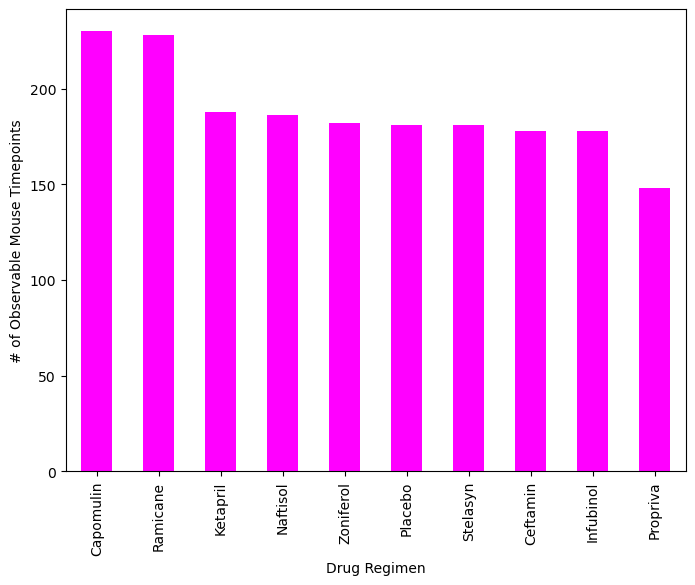

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# count total number of rows for each drug regimen
rows_per_DR = mouse_data_no_duplicates.groupby('Drug Regimen').size()
#sort into highest to lowest order
rows_per_DR = rows_per_DR.sort_values(ascending=False)
# generate a bar plot 
rows_per_DR.plot(kind='bar',color='magenta', figsize=(8,6))
#set the x and y axis headings
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observable Mouse Timepoints')
#display the plot
plt.show()

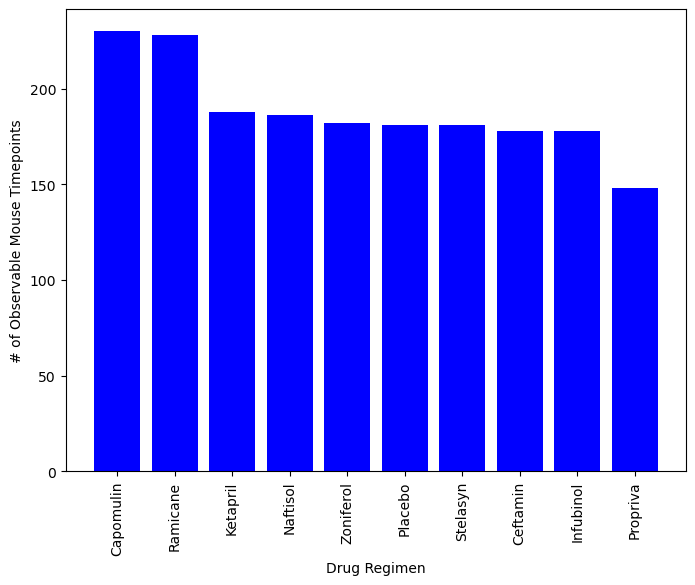

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#use the values and sort order from above
plt.figure(figsize=(8,6))
plt.bar(rows_per_DR.index,rows_per_DR, color='blue')
#set the x and y axis labels
plt.xlabel('Drug Regimen',)
plt.ylabel('# of Observable Mouse Timepoints')
plt.xticks(rotation=90)
#display the plot
plt.show()

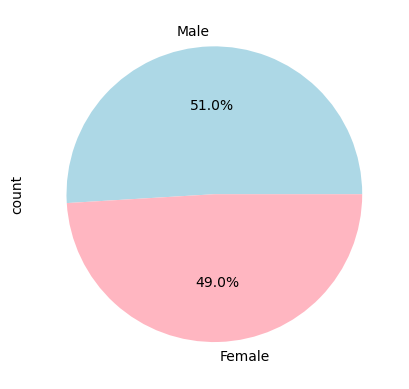

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#set some default values for both charts
sex = ['Male', 'Female']
colours = ['lightblue', 'lightpink']
explode = (0.1,0)
#count the number of male and female mice
mouse_gender = mouse_data_no_duplicates['Sex'].value_counts()
#plot using pandas
mouse_gender.plot(kind='pie', autopct='%1.1f%%', colors=colours)
#display the plot
plt.show()

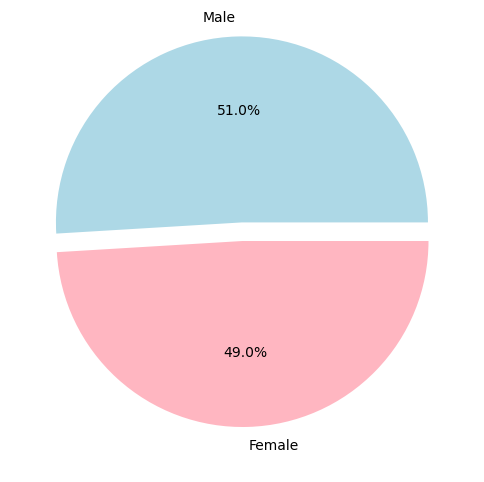

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#using the values from above
plt.figure(figsize=(6,6))
plt.axis('equal')
plt.pie(mouse_gender, labels=sex, colors=colours, explode=explode,autopct='%1.1f%%')
#display the plot
plt.show()

### Quartiles, Outliers and Boxplots


In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#groupby by mouse id and use max on timepoint
last_timepoint = mouse_data_no_duplicates.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#right merge to only get those values
Merged_mouse_df = pd.merge(mouse_data_no_duplicates, last_timepoint, on=['Mouse ID', 'Timepoint'], how='right')
Merged_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [21]:
# Put treatments into a list for a for loop (and later for plot labels)
#create list of four most promising treatments
Treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
Tumor_vol_data = []
#Loop through each drug, append resulting data to the Tumor_vol_data list.
for treatment in Treatment_list:
    #Filter by drug regimen
    treatment_rows = Merged_mouse_df[Merged_mouse_df['Drug Regimen'] == treatment]
    tumor_vols = treatment_rows['Tumor Volume (mm3)'].tolist()
    #Add relevant data to new list
    Tumor_vol_data.append(tumor_vols)
    # Calculate IQR for each treatment (using numpy percentile)
    IQR_values = np.percentile(tumor_vols,75) - np.percentile(tumor_vols, 25)
    # Determine potential outliers using upper and lower bounds
    lower_bound = np.percentile(tumor_vols, 25) - 1.5 * IQR_values
    upper_bound = np.percentile(tumor_vols, 75) + 1.5 * IQR_values
    # Identify potential outliers
    outliers = [value for value in tumor_vols if value < lower_bound or value > upper_bound]
    # Print results
    print(f"Treatment: {treatment}")
    print(f"IQR: {IQR_values}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {outliers}\n")




Treatment: Capomulin
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: []

Treatment: Ramicane
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: []

Treatment: Infubinol
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: [36.3213458]

Treatment: Ceftamin
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: []



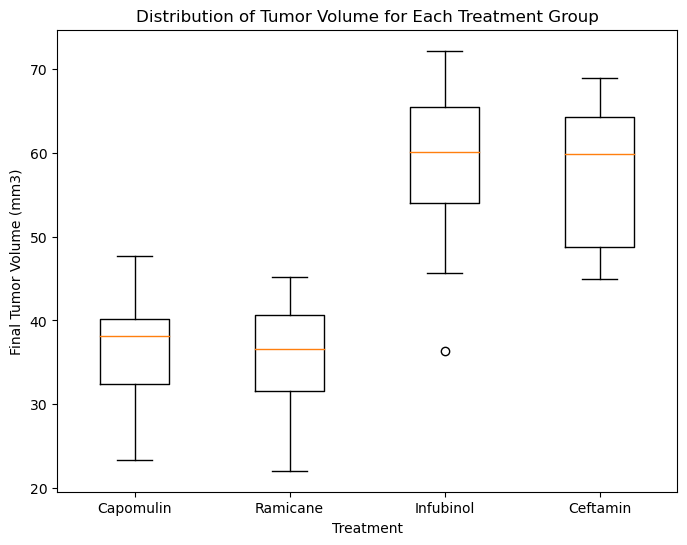

In [28]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(8, 6))
plt.boxplot(Tumor_vol_data, labels=Treatment_list)
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

### Line and Scatter Plots

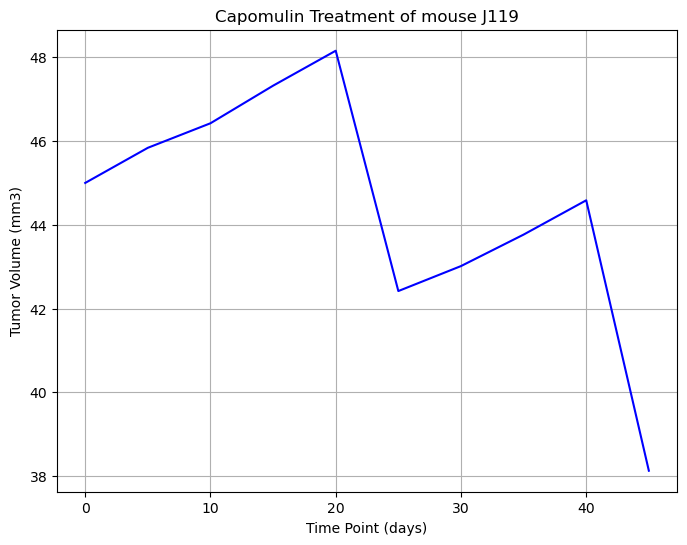

In [41]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
my_mouse = 'j119'
capo_data = mouse_data_no_duplicates[(mouse_data_no_duplicates['Drug Regimen'] == 'Capomulin') & (mouse_data_no_duplicates['Mouse ID'] == my_mouse)]
#capo_data
 # Create a line plot
plt.figure(figsize=(8, 6))
plt.plot(capo_data['Timepoint'], capo_data['Tumor Volume (mm3)'], linestyle='-', color='b')
    
plt.title(f'Capomulin Treatment of mouse {my_mouse.upper()}')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

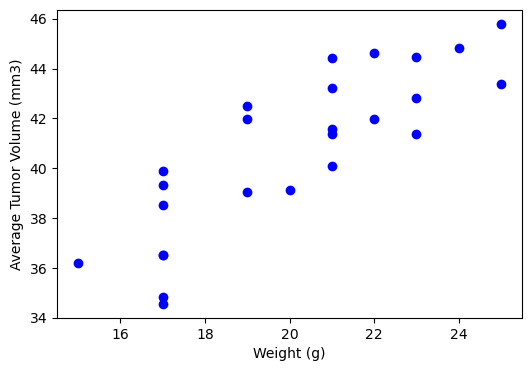

In [55]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Filter data by Capomulin regimen
Capomulin_data = mouse_data_no_duplicates[mouse_data_no_duplicates['Drug Regimen'] == 'Capomulin']
#Caluclate the average observed tumor volume for each mouse. Groupby and reset ID
average_tumor_volume = Capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
#add the average tumor volume to the Capomulin data. Use merge.
Capo_merged = pd.merge(average_tumor_volume, Capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='left').drop_duplicates()

#create scatter plot of data
plt.figure(figsize=(6, 4))
plt.scatter(Capo_merged['Weight (g)'], Capo_merged['Tumor Volume (mm3)'], color='b', marker='o')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

### Correlation and Regression

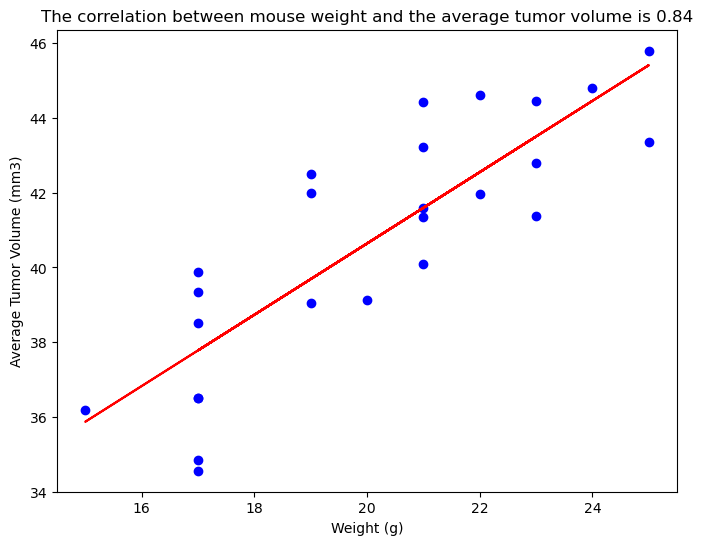

In [63]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation_coefficient, _ = st.linregress(Capo_merged['Weight (g)'], Capo_merged['Tumor Volume (mm3)'])[:2]

# Create a linear regression model
slope, intercept, _, _, _ = st.linregress(Capo_merged['Weight (g)'], Capo_merged['Tumor Volume (mm3)'])
# Create a scatter plot with the linear regression line
plt.figure(figsize=(8, 6))
plt.scatter(Capo_merged['Weight (g)'], Capo_merged['Tumor Volume (mm3)'], color='b', marker='o', label='Observations')
plt.plot(Capo_merged['Weight (g)'], slope * Capo_merged['Weight (g)'] + intercept, color='r', label='Linear Regression')
plt.title('The correlation between mouse weight and the average tumor volume is 0.84')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()